In [68]:
import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import tensorflow as tf
from tensorflow.keras import initializers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam

from qbstyles import mpl_style

mpl_style(dark=True)
pd.options.display.float_format = "{:.2f}".format

In [3]:
def model_equation(model, feature_names, target_label, variable_as_name=False):
    # Check if model is Keras (has get_weights)
    if hasattr(model, "get_weights"):
        weights = model.get_weights()
        coef = weights[0].flatten()
        intercept = weights[1].item()
    # Else assume it's sklearn
    elif hasattr(model, "coef_") and hasattr(model, "intercept_"):
        coef = model.coef_.flatten()
        intercept = model.intercept_.item() if hasattr(model.intercept_, 'item') else model.intercept_
    else:
        raise ValueError("Unsupported model type")

    # Variable name handling
    if variable_as_name:
        variables = [f"{name}" for name in feature_names]
        y = target_label
    else:
        variables = [f"x{i}" for i in range(1, len(feature_names) + 1)]
        y = "y"
        for variable, feature_name in zip(variables, feature_names):
            print(f"{variable} = {feature_name}")
        print(f"{y} = {target_label}")

    # Construct equation
    terms = [f"{coef[i]:.2f} * {variables[i]}" for i in range(len(coef))]
    equation = f"{y} = {terms[0]}"
    for term in terms[1:]:
        if term.startswith('-'):
            equation += f" - {term[1:]}"
        else:
            equation += f" + {term}"
    equation += f" + {intercept:.2f}" if intercept >= 0 else f" - {-intercept:.2f}"
    return equation


def loss_curve(history, color="blue"):
    plt.plot(history.history['loss'], color=color, label='Training Loss')
    plt.title('Model Loss Curve')
    plt.ylabel('Loss')
    plt.xlabel('Epochs')
    plt.legend()
    plt.show()

In [170]:
x1 = np.linspace(-0.5, 0.5)
x2 = np.linspace(-50_000_000, 50_000_000)

y = 1 * x1 + 1 * x2 + 8

df = pd.DataFrame({
    'x1': x1, 'x2': x2, 'y': y,
})

In [171]:
scaler = MinMaxScaler()
features = ['x1', 'x2']
target = 'y'

X = df[features]
X_scaled = scaler.fit_transform(X)
y = df[target]

In [172]:
sklearn_model = LinearRegression()
sklearn_model.fit(X, y)

LinearRegression()

#### Hyper-parameters

In [198]:
seed = 42
input_shape = len(features),
learning_rate = 0.5
loss = "mse"
optimizer = Adam(learning_rate=learning_rate)
weights_init = initializers.Zeros()
bias_init = initializers.Zeros()

random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

#### Model trained on Raw data

In [199]:
raw_model = Sequential([
    Input(shape=input_shape),
    Dense(1, name="LinearRegression", kernel_initializer=weights_init, bias_initializer=bias_init),
], name="raw_model")

raw_model.compile(loss=loss, optimizer=optimizer)
raw_model.summary()
model_equation(raw_model, features, target)

Model: "raw_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ LinearRegression (Dense)        │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3 (12.00 B)

 Trainable params: 3 (12.00 B)

 Non-trainable params: 0 (0.00 B)

x1 = x1
x2 = x2
y = y


'y = 0.00 * x1 + 0.00 * x2 + 0.00'

In [200]:
scaled_model = Sequential([
    Input(shape=input_shape),
    Dense(1, name="LinearRegression", kernel_initializer=weights_init, bias_initializer=bias_init),
], name="scaled_model")

scaled_model.compile(loss=loss, optimizer=optimizer)
scaled_model.summary()
model_equation(scaled_model, features, target)

Model: "scaled_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ LinearRegression (Dense)        │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3 (12.00 B)

 Trainable params: 3 (12.00 B)

 Non-trainable params: 0 (0.00 B)

x1 = x1
x2 = x2
y = y


'y = 0.00 * x1 + 0.00 * x2 + 0.00'

#### Training loop (Raw Model)

Epoch 1/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 751761077829632.0000  
Epoch 2/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 197279776505856.0000 
Epoch 3/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 24359456473088.0000
Epoch 4/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 71931852226560.0000 
Epoch 5/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 6330363412480.0000
Epoch 6/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 27460877942784.0000
Epoch 7/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 2726481100800.0000
Epoch 8/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 9250029961216.0000 
Epoch 9/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 2871976263680.0000
Epoch 10/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 1696679591936.0000 
Epoch 11/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 2350758494208.0000
Epoch 12/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 265768796160.0000
Epoch 13/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 615273463808.00

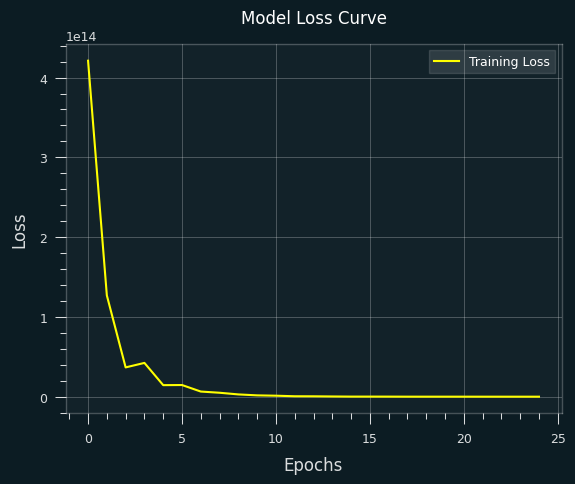

In [201]:
history = raw_model.fit(
    x=X, y=y,
    batch_size=10,
    epochs=25,
    shuffle=False,
)

loss_curve(history, color="yellow")

#### Training loop (Scaled Model)

Epoch 1/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 1462655488.0000
Epoch 2/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1632640000.0000
Epoch 3/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1429883008.0000
Epoch 4/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 1143418112.0000
Epoch 5/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 928498688.0000  
Epoch 6/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 816721280.0000  
Epoch 7/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 815884928.0000  
Epoch 8/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 929373440.0000  
Epoch 9/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1203452672.0000
Epoch 10/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1729425408.0000
Epoch 11/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 2723371264.0000 
Epoch 12/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 4615241216.0000
Epoch 13/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 8357070336.0000  
Epoch 14/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 

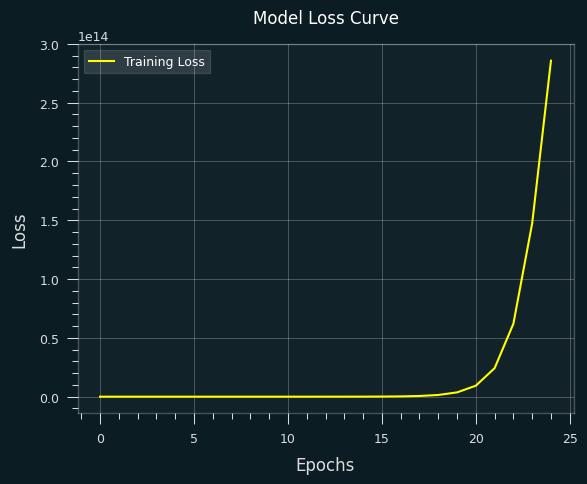

In [202]:
history = raw_model.fit(
    x=X, y=y,
    batch_size=10,
    epochs=25,
    shuffle=False,
)

loss_curve(history, color="yellow")

In [203]:
sklearn_equation = model_equation(sklearn_model, features, target)
raw_equation = model_equation(raw_model, features, target)
scaled_equation = model_equation(scaled_model, features, target)

sklearn_pred = sklearn_model.predict(X)
raw_pred = raw_model.predict(X, verbose=0)
scaled_pred = scaled_model.predict(X_scaled, verbose=0)

sklearn_loss = mean_squared_error(y, sklearn_pred) * 100
raw_loss = mean_squared_error(y, raw_pred) * 100
scaled_loss = mean_squared_error(y, scaled_pred) * 100

sklearn_acc = r2_score(y, sklearn_pred) * 100
raw_acc = r2_score(y, raw_pred) * 100
scaled_acc = r2_score(y, scaled_pred) * 100

print(f"Loss of sklearn {sklearn_loss:,.2f}")
print(f"Loss of raw {raw_loss:,.2f}")
print(f"Loss of scaled {scaled_loss:,.2f}")
print()
print(f"Accuracy of sklearn {sklearn_acc:,.2f}")
print(f"Accuracy of raw {raw_acc:,.2f}")
print(f"Accuracy of scaled {scaled_acc:,.2f}")
print()
print(f"{sklearn_equation = }")
print(f"{raw_equation = }")
print(f"{scaled_equation = }")

x1 = x1
x2 = x2
y = y
x1 = x1
x2 = x2
y = y
x1 = x1
x2 = x2
y = y
Loss of sklearn 0.00
Loss of raw 29,206,294,504,843,680.00
Loss of scaled 86,734,695,612,251,296.00

Accuracy of sklearn 100.00
Accuracy of raw 66.33
Accuracy of scaled -0.00

sklearn_equation = 'y = 0.00 * x1 + 1.00 * x2 + 8.00'
raw_equation = 'y = 0.42 * x1 + 0.42 * x2 - 3.11'
scaled_equation = 'y = 0.00 * x1 + 0.00 * x2 + 0.00'


In [204]:
max(raw_loss, scaled_loss), (raw_loss, scaled_loss)

(8.67346956122513e+16, (2.920629450484368e+16, 8.67346956122513e+16))

In [139]:
np.equal(scaled_model.predict(X), scaled_model.predict(X_scaled)).all()

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


np.True_